<a href="https://colab.research.google.com/github/Duder5000/Computer-Vision-Project/blob/main/Copy_of_YOLOv8_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/proj/YOLODataset"
!ls

/content/drive/MyDrive/proj/YOLODataset
'1*jW-Q9DvmB-zvM4hgJlBx3g.png'	 runs	 train.cache   val.cache        yolov8n-cls.pt
 datasets			 train	 val	       yolov8m-cls.pt   yolov8n.pt


# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/201.2 GB disk)


# 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


if CLI the format should be:

    yolo TASK MODE ARGS

  Where:

    TASK (optional) is one of (detect, segment, classify, pose)


    MODE (required) is one of (train, val, predict, export, track)


    ARGS (optional) are arg=value pairs like imgsz=640 that override defaults.


Default ARG values are defined on this page from the cfg/defaults.yaml file.



In [4]:
# Run inference on an image with YOLOv8n

# Detection:
#!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'
#!yolo predict model=yolov8n.pt source='https://www.thoughtco.com/thmb/Hw83C2QW8dWeDUt7R4pYyPke3HI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-547031277-58ef97803df78cd3fc724e24.jpg' save=True
#!yolo predict model=yolov8n.pt source=0

# Segmentation:
#!yolo segment predict  model=yolov8s-seg.pt source='https://ultralytics.com/images/zidane.jpg'

#pose detection:
!yolo classify predict  model=yolov8s-cls.pt source='https://ultralytics.com/images/zidane.jpg'


#add arguments of "save and show"

100% 12.2M/12.2M [00:00<00:00, 173MB/s]
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 6356200 parameters, 0 gradients, 13.5 GFLOPs

100% 165k/165k [00:00<00:00, 34.1MB/s]
100% 755k/755k [00:00<00:00, 115MB/s]
image 1/1 /content/drive/MyDrive/proj/YOLODataset/zidane.jpg: 224x224 suit 0.47, groom 0.08, rugby_ball 0.07, bow_tie 0.05, bulletproof_vest 0.05, 4.0ms
Speed: 65.5ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# SHOW THE IMAGE STORED
# %matplotlib inline
# from PIL import Image

# Image.open('/content/runs/detect/predict3/GettyImages-547031277-58ef97803df78cd3fc724e24.jpg')


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/212889447-69e5bdf1-5800-4e29-835e-2ed2336dede2.jpg" width="600">

you can also use functions of ultralytics intead of CLI commands.

In [ ]:
# %matplotlib inline
# from PIL import Image

# from ultralytics import YOLO

# # Load a pretrained YOLOv8n model
# model = YOLO('yolov8n.pt')

# # Run inference on 'bus.jpg'
# results = model('https://ultralytics.com/images/zidane.jpg')  # results list

# # Show the results
# for r in results:
#     im_array = r.plot()  # plot a BGR numpy array of predictions
#     im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
#     im.show()  # show (doesn't work on colab)
#     im.save('results.jpg')  # save image


# #show image directly
# from google.colab.patches import cv2_imshow
# cv2_imshow(im_array)

# #show saved image
# #Image.open('results.jpg')

# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [ ]:
# # Download COCO val
# import torch
# torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
# !unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

In [ ]:
# # Validate YOLOv8n on COCO8 val
# !yolo val model=yolov8n.pt data=coco8.yaml

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .


In YOLO (You Only Look Once), a YAML file is used for configuration and setup. It specifies parameters such as paths to datasets, model architecture, training hyperparameters, and class names. The YAML file is essential for defining how the YOLO model should be trained and what it should detect, making it an integral part of customizing the YOLO model for specific object detection tasks.

In code below, coco8.yaml is used:



    # Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
    path: ../datasets/coco8  # dataset root dir
    train: images/train  # train images (relative to 'path') 4 images
    val: images/val  # val images (relative to 'path') 4 images
    test:  # test images (optional)

    # Classes
    names:
      0: person
      1: bicycle
      2: car
      3: motorcycle
      4: airplane
      5: bus
      6: train
      7: truck
      8: boat
      9: traffic light
      10: fire hydrant
      11: stop sign
      12: parking meter
      13: bench
      14: bird
      15: cat
      16: dog
      17: horse
      18: sheep
      19: cow
      20: elephant
      21: bear
      22: zebra
      23: giraffe
      24: backpack
      25: umbrella
      26: handbag
      27: tie
      28: suitcase
      29: frisbee
      30: skis
      31: snowboard
      32: sports ball
      33: kite
      34: baseball bat
      35: baseball glove
      36: skateboard
      37: surfboard
      38: tennis racket
      39: bottle
      40: wine glass
      41: cup
      42: fork
      43: knife
      44: spoon
      45: bowl
      46: banana
      47: apple
      48: sandwich
      49: orange
      50: broccoli
      51: carrot
      52: hot dog
      53: pizza
      54: donut
      55: cake
      56: chair
      57: couch
      58: potted plant
      59: bed
      60: dining table
      61: toilet
      62: tv
      63: laptop
      64: mouse
      65: remote
      66: keyboard
      67: cell phone
      68: microwave
      69: oven
      70: toaster
      71: sink
      72: refrigerator
      73: book
      74: clock
      75: vase
      76: scissors
      77: teddy bear
      78: hair drier
      79: toothbrush


    # Download script/URL (optional)
    download: https://ultralytics.com/assets/coco8.zip

In [ ]:
# Train YOLOv8n on COCO8 for 3 epochs
#!yolo train model=yolov8n.pt data=coco8.yaml epochs=3 imgsz=640

# !yolo train model=yolov8n.pt data=coco8-seg.yaml epochs=3 imgsz=640



# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
# from ultralytics import YOLO

# # Load a model
# model = YOLO('yolov8n.yaml')  # build a new model from scratch
# model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# # Use the model
# results = model.train(data='coco128.yaml', epochs=3)  # train the model
# results = model.val()  # evaluate model performance on the validation set
# results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
# results = model.export(format='onnx')  # export the model to ONNX format

# 6. Tasks

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [7]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8m-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='/content/drive/MyDrive/proj/YOLODataset', epochs=3)  # train the model


Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/drive/MyDrive/proj/YOLODataset, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/drive/MyDrive/proj/YOLODataset/train... 2089 images, 0 corrupt: 100%|██████████| 2089/2089 [19:28<00:00,  1.79it/s]


train: New cache created: /content/drive/MyDrive/proj/YOLODataset/train.cache


val: Scanning /content/drive/MyDrive/proj/YOLODataset/val... 883 images, 0 corrupt: 100%|██████████| 883/883 [07:57<00:00,  1.85it/s]


val: New cache created: /content/drive/MyDrive/proj/YOLODataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:07<00:00,  3.85it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:06<00:00,  4.31it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:06<00:00,  4.58it/s]

                   all      0.957          1



3 epochs completed in 0.031 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train/weights/best.pt, 31.7MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15767780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/proj/YOLODataset/train... found 2089 images in 4 classes ✅ 
val: /content/drive/MyDrive/proj/YOLODataset/val... found 883 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:07<00:00,  3.63it/s]


                   all       0.96          1
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6ba80c8eb0>
curves: []
curves_results: []
fitness: 0.9801811873912811
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9603623747825623, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9801811873912811}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0734769339469659, 'inference': 1.0092201751328809, 'loss': 0.0007797880593944648, 'postprocess': 0.0012020832549945145}
task: 'classify'
top1: 0.9603623747825623
top5: 1.0

In [8]:
model= YOLO("/content/drive/MyDrive/proj/YOLODataset/runs/classify/train/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
#metrics.top5   # top5 accuracy

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15767780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/proj/YOLODataset/train... found 2089 images in 4 classes ✅ 
val: /content/drive/MyDrive/proj/YOLODataset/val... found 883 images in 4 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/proj/YOLODataset/val... 883 images, 0 corrupt: 100%|██████████| 883/883 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 56/56 [00:09<00:00,  6.13it/s]


                   all       0.96          1
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


0.9603623747825623

In [11]:
results=model('/content/drive/MyDrive/proj/paper6.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities



image 1/1 /content/drive/MyDrive/proj/paper6.jpg: 224x224 paper 0.95, cardboard 0.05, biological 0.01, organics 0.00, 8.2ms
Speed: 9.1ms preprocess, 8.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0063, 0.0452, 0.0014, 0.9471], device='cuda:0')
orig_shape: None
shape: torch.Size([4])
top1: 3
top1conf: tensor(0.9471, device='cuda:0')
top5: [3, 1, 0, 2]
top5conf: tensor([0.9471, 0.0452, 0.0063, 0.0014], device='cuda:0')


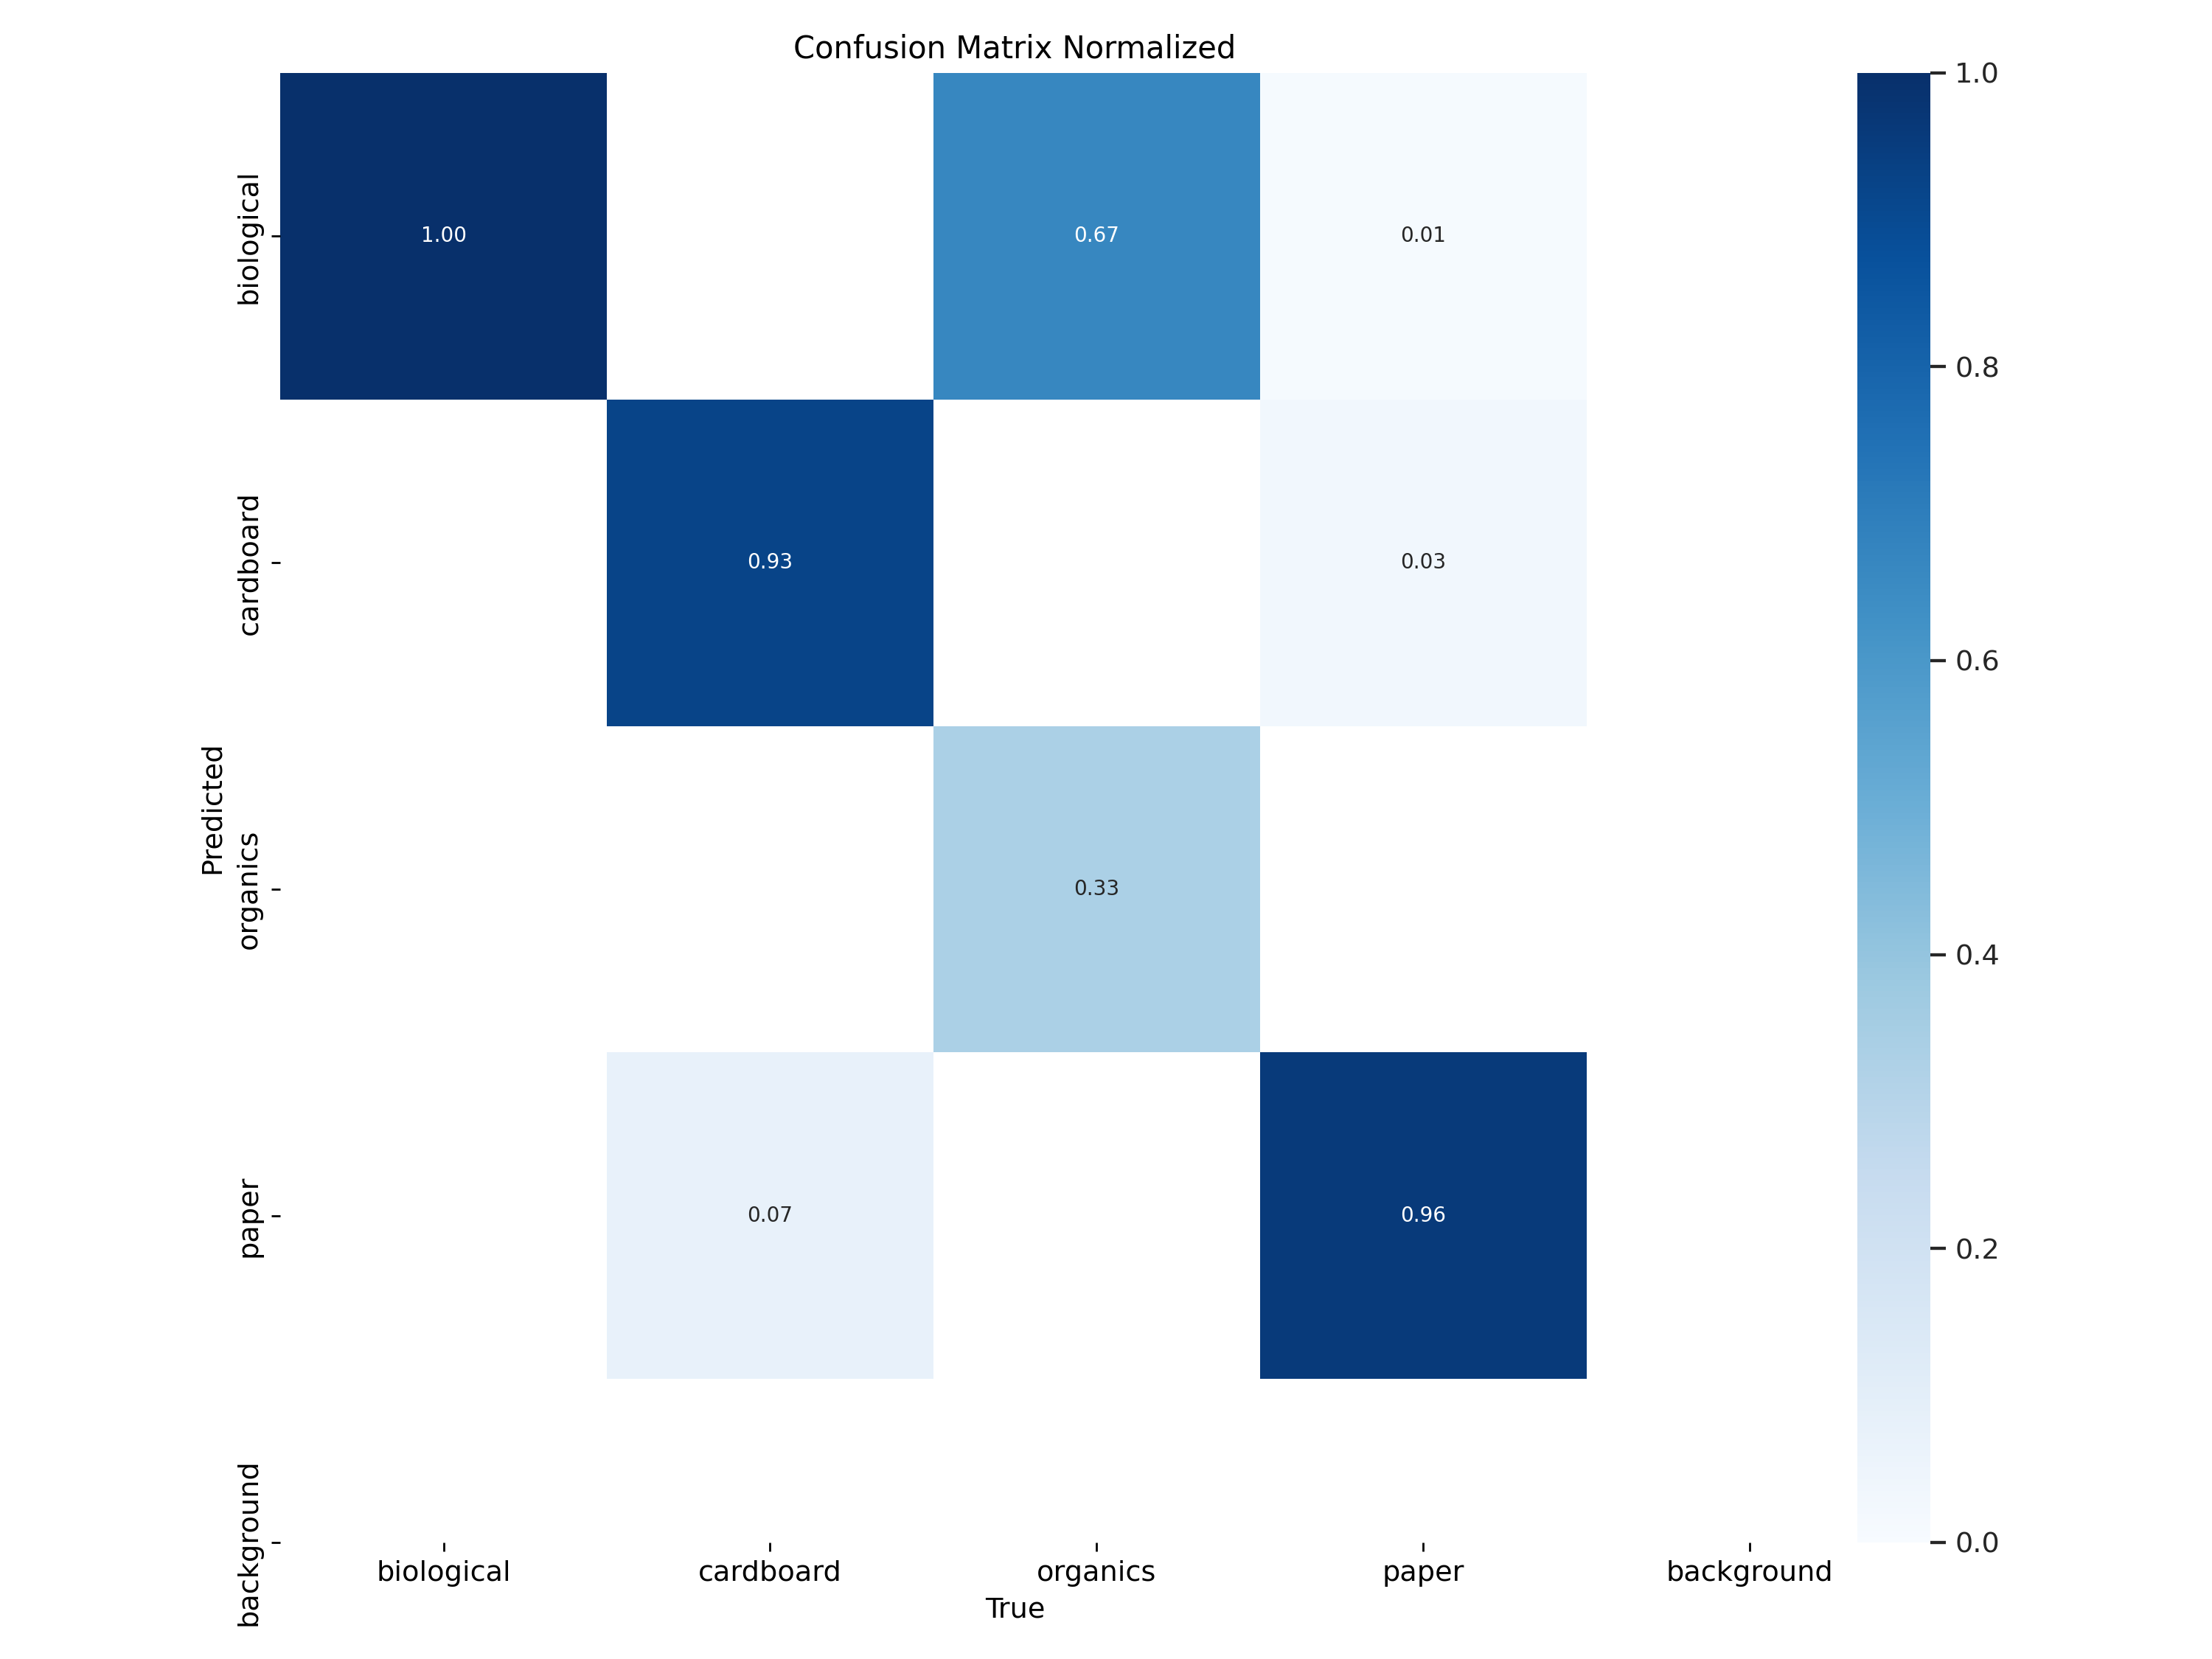

In [10]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/proj/YOLODataset/runs/classify/train/confusion_matrix_normalized.png')